# Greedy Scheduler

Used for testing to ensure that the Factory Env Works

In [1]:
import sys
from pathlib import Path

import json

# Add project root to Python path
project_root = Path().resolve().parent.parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

data_file = project_root / "data" / "Input_JSON_Schedule_Optimization.json"
with open(data_file) as f:
    data = json.load(f) # ensure that this works

In [2]:
product_requests = data["product_requests"] # frontend will change this, product_requests and steps specifically
product_requests

[{'product': 'WOVEN LABEL OURELA FABRIC', 'amount': 13},
 {'product': 'ESTORE RIBBON', 'amount': 6},
 {'product': 'WOVEN LABEL OURELA CUT', 'amount': 5},
 {'product': 'GORGORÃƒO RIBBON', 'amount': 13},
 {'product': 'GORGORÃƒO RIBBON W/ INSCR', 'amount': 5},
 {'product': 'TAFFETA EMBLEM', 'amount': 10},
 {'product': 'PRINTED RIBBON', 'amount': 30},
 {'product': 'ELASTIC W/ INSCR', 'amount': 2},
 {'product': 'ELASTIC W/ INSCR', 'amount': 1, 'deadline': 960},
 {'product': 'ROK ELASTIC', 'amount': 3},
 {'product': 'SMOOTH STRAP(A)', 'amount': 4},
 {'product': 'BRAIDED ELASTIC', 'amount': 15},
 {'product': 'PRINTED RIBBON  PES', 'amount': 10},
 {'product': 'SMOOTH ELASTIC(A)', 'amount': 5},
 {'product': 'STRAP W/ STRIPES', 'amount': 10}]

In [3]:
from backend.job_builder import JobBuilder, ProductRequest
from backend.factory_logic_loader import FactoryLogic, FactoryLogicLoader

product_requests_data = data["product_requests"] # frontend will change this, product_requests and steps specifically
product_requests = [ProductRequest(**pr) for pr in product_requests_data]

factory_logic = FactoryLogicLoader.load_from_file(filepath=str(data_file))
job_builder = JobBuilder(factory_logic=factory_logic)
jobs = job_builder.build_jobs(product_requests=product_requests) # job objects
# jobs

Energy Cost Total: 39.98366383800001
Number of jobs not done: 0
Number of jobs done: 132


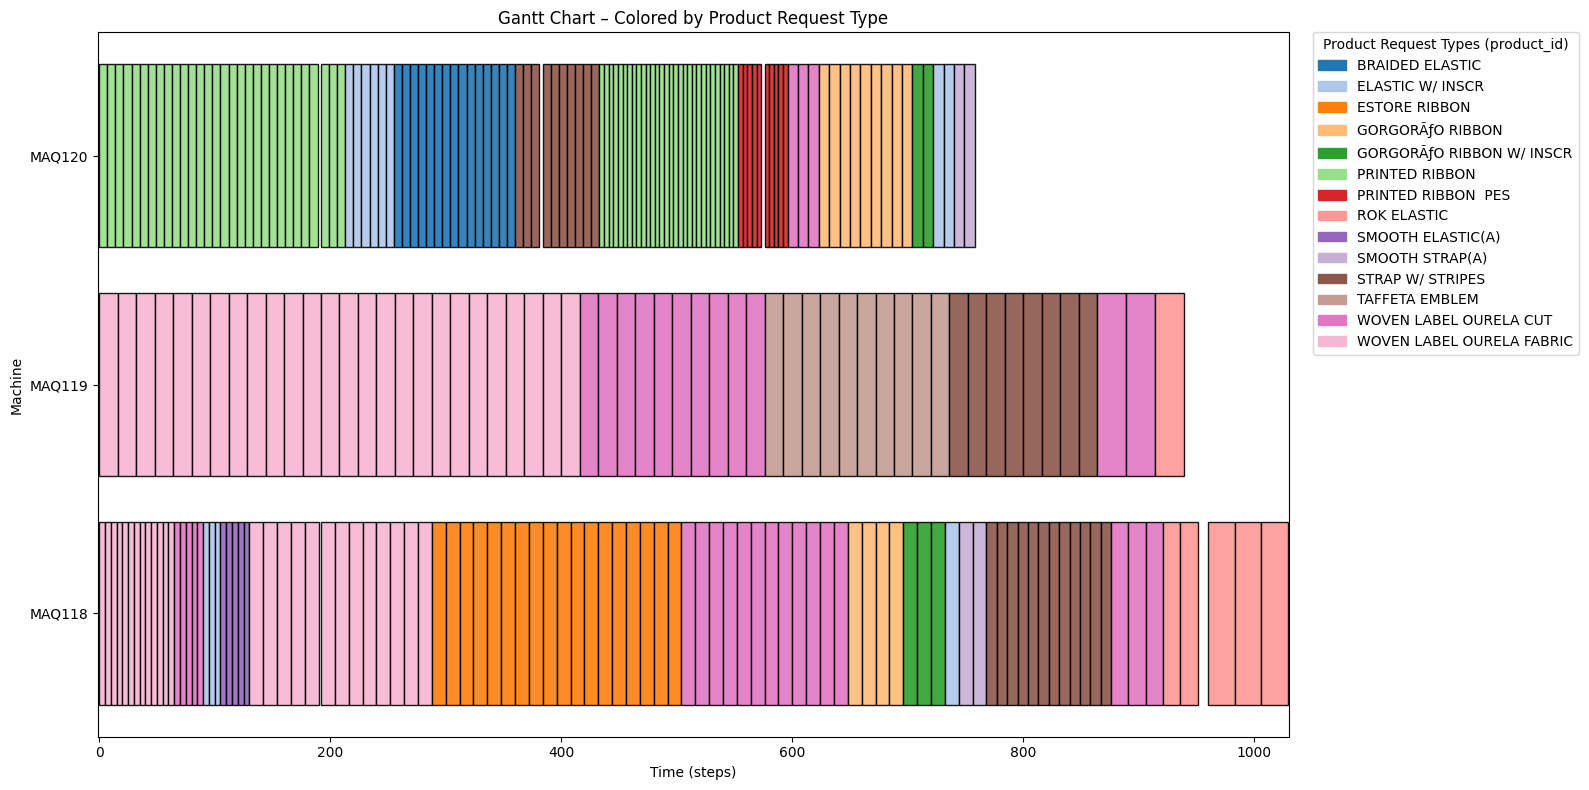

: 

In [ ]:
from backend.job_builder import JobBuilder, ProductRequest
from backend.factory_logic_loader import FactoryLogic, FactoryLogicLoader
from backend.factory import Factory
from backend.schedulers.greedy.greedy_scheduler import GreedyScheduler
import json

steps = 1152

roduct_requests_data = data["product_requests"] # frontend will change this, product_requests and steps specifically
product_requests = [ProductRequest(**pr) for pr in product_requests_data]

factory_logic = FactoryLogicLoader.load_from_file(filepath=data_file)
job_builder = JobBuilder(factory_logic=factory_logic)
jobs = job_builder.build_jobs(product_requests=product_requests) # job objects
factory = Factory(factory_logic=factory_logic)
factory.add_jobs(jobs=jobs)

# choose the scheduler
scheduler = GreedyScheduler(greedy_type="min_power")

state = factory.get_factory_state()

total_power_cost = 0
while not factory.done() and factory.current_step < steps:
    chosen_actions = scheduler.choose(state)
    factory.apply_actions(chosen_actions)
    step_info = factory.step()
    total_power_cost += step_info['step_power_cost']
    state = factory.get_factory_state()


scheduled_actions = scheduler.scheduled_actions
# remove None objects
scheduled_actions = [
    action for action in scheduled_actions
    if action is not None
]

print(f"Energy Cost Total: {total_power_cost}")
print(f"Number of jobs not done: {len([job for job in factory.jobs if not job.done])}")
print(f"Number of jobs done: {len([job for job in factory.jobs if job.done])}")

scheduled_actions = scheduler.scheduled_actions
# remove None objects
scheduled_actions = [
    action for action in scheduled_actions
    if action is not None
]

scheduler.plot_gantt_by_product(factory, scheduled_actions)